In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('FlowRateValidationSet.csv')
data

,No,RT (s),Normalized RT (s),m/z_light,m/z_heavy,Neutral Mass (Da),Intensity,nCharge,nTag,Unnamed: 9,...,D.5,E,E.1,E.2,E.3,E.4,E.5,QC,QC.1,QC.2
0,A-1,63.8,80.2,392.0370,394.0442,157.9787,106000.0,1,1,Unidentified,...,0.531,0.385,0.475,0.482,0.498,0.431,0.374,0.671,0.5154,0.671
1,A-2,63.8,80.2,349.0155,351.0221,114.9572,80100.0,1,1,Unidentified,...,0.884,0.494,0.552,0.646,0.486,0.513,0.693,0.835,0.6420,0.835
2,A-4,65.6,82.0,389.1280,391.1346,155.0697,2910000.0,1,1,Tier 3 zero-reaction,...,0.928,1.141,1.087,1.117,1.123,1.028,1.023,0.894,0.8540,0.894
3,A-5,65.7,82.1,500.1311,504.1446,33.0217,225000.0,1,2,Tier 3 zero-reaction,...,0.768,0.823,0.762,0.914,0.932,1.098,1.137,1.074,0.8200,1.074
4,A-6,66.4,82.8,351.1375,353.1441,117.0792,84600.0,1,1,Tier 3 zero-reaction,...,0.618,0.652,0.696,0.839,0.834,0.887,0.859,0.943,0.9740,0.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,A-2461,795.0,823.9,592.3670,594.3727,358.3087,31300000.0,1,1,Tier 3 zero-reaction,...,0.949,0.761,0.723,0.799,0.802,0.746,0.735,0.835,0.8120,0.835
1866,A-2463,796.3,825.2,560.3276,564.3363,93.2183,66300.0,1,2,Unidentified,...,0.131,0.225,0.250,0.101,0.202,0.149,0.184,1.060,1.6200,1.060
1867,A-2464,796.7,825.6,441.1154,443.1200,207.0570,108000.0,1,1,Tier 3 one-reaction,...,1.016,0.757,0.830,0.678,0.891,0.972,0.780,1.430,0.5708,1.430
1868,A-2465,797.0,825.8,633.4073,637.4242,166.2979,56700.0,1,2,Unidentified,...,0.581,1.303,1.539,1.047,0.887,0.667,0.911,1.302,0.8430,1.302


In [3]:
Tier3 = data['Compound'].isna() * data['Compound.1'].isna()

In [4]:
# select only Tier 1 and Tier 2 compounds (Columns COmpound and COmpound.1 are not nans)
data = data.loc[~Tier3, :]

In [5]:
data

,No,RT (s),Normalized RT (s),m/z_light,m/z_heavy,Neutral Mass (Da),Intensity,nCharge,nTag,Unnamed: 9,...,D.5,E,E.1,E.2,E.3,E.4,E.5,QC,QC.1,QC.2
7,A-T267,67.7,83.8,387.0682,389.0748,153.0096,99100.0,1,1,Tier 2,...,1.594,1.733,1.735,1.6470,1.6930,1.640,1.602,1.2380,1.2030,1.2380
10,A-T402,68.6,84.9,403.0624,405.0692,169.0045,155000.0,1,1,Tier 2,...,1.317,1.577,1.483,1.4700,0.4841,1.529,1.610,1.2320,1.1580,1.2320
13,A-17,69.6,86.1,495.1545,497.1612,261.0962,33900.0,1,1,Tier 2,...,0.819,0.921,0.837,0.7400,0.8380,0.764,0.721,1.3556,1.0618,1.3556
14,A-T184,69.6,86.1,375.0779,377.0844,141.0191,452000.0,1,1,Tier 1,...,1.031,1.345,1.273,1.2680,1.2880,1.253,1.227,0.9930,0.9040,0.9930
15,A-T1885,69.7,86.3,537.2127,539.2195,303.1543,35900.0,1,1,Tier 2,...,0.602,0.554,0.484,0.5370,0.5540,0.533,0.528,0.8610,0.7990,0.8610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,A-2005,558.6,585.9,396.0225,398.0294,161.9641,77100.0,1,1,Tier 1,...,1.362,1.115,0.991,1.2500,1.1130,1.110,1.011,1.0980,0.9650,1.0980
1586,A-2028,568.2,595.3,577.1473,581.1615,110.0379,73800.0,1,2,Tier 1,...,0.811,1.195,1.199,2.8012,1.2230,1.256,1.035,1.1630,0.7460,1.1630
1589,A-T2797,568.9,595.8,370.1472,372.1537,136.0888,45700.0,1,1,Tier 1,...,1.082,0.921,0.744,0.7340,0.8860,0.796,0.784,0.8010,0.3771,0.8010
1599,A-2045,575.1,602.1,646.2045,650.2177,179.0951,91500.0,1,2,Tier 2,...,0.441,0.572,0.445,0.4420,0.4660,0.567,0.535,1.1270,1.0160,1.1270


In [6]:
# exclude outliers

In [7]:
data.columns[24:54]

Index(['A', 'A.1', 'A.2', 'A.3', 'A.4', 'A.5', 'B', 'B.1', 'B.2', 'B.3', 'B.4',
       'B.5', 'C', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5', 'D', 'D.1', 'D.2', 'D.3',
       'D.4', 'D.5', 'E', 'E.1', 'E.2', 'E.3', 'E.4', 'E.5'],
      dtype='object')

In [8]:
flows_cols = [data.columns[i:i+6] for i in np.arange(24, 54, 6)]
flows_data = [data[cols] for cols in flows_cols]
# exclude anything below 0.25 and above 3 - set to nan
# for i in range(5):
#     flows_data[i] = flows_data[i].mask((flows_data[i] < 0.1) | (flows_data[i] > 3))

/tmp/ipykernel_46959/2005960918.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([np.log10(means[i][means[i]>0.1]) for i in np.arange(5)],


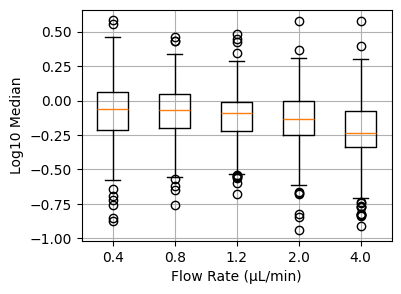

In [16]:
# plot average
plt.figure(figsize=(4, 3))
means = [np.nanmedian(flows_data[i].values, axis=1) for i in np.arange(4, -1, -1)]
plt.boxplot([np.log10(means[i][means[i]>0.1]) for i in np.arange(5)],
            labels=['0.4', '0.8', '1.2', '2.0', '4.0'])
# plt.ylim(0, 0.5)
plt.xlabel('Flow Rate (µL/min)')
plt.ylabel('Log10 Median')
# plt.title('Log10 Coefficient of Variation of analyte concentrations\nat different flow rates')
plt.grid(True)
plt.savefig('flow_rate_median_validation_boxplot.pdf', dpi=300)
plt.show()

/tmp/ipykernel_46959/1598753002.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([means[i][means[i]>-10] for i in np.arange(5)],


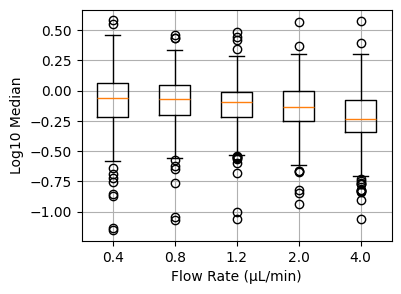

In [18]:
# plot average
plt.figure(figsize=(4, 3))
means = [np.nanmedian(np.log10(flows_data[i].values), axis=1) for i in np.arange(4, -1, -1)]
plt.boxplot([means[i][means[i]>-10] for i in np.arange(5)],
            labels=['0.4', '0.8', '1.2', '2.0', '4.0'])
# plt.ylim(0, 0.5)
plt.xlabel('Flow Rate (µL/min)')
plt.ylabel('Log10 Median')
# plt.title('Log10 Coefficient of Variation of analyte concentrations\nat different flow rates')
plt.grid(True)
# plt.savefig('flow_rate_median_validation_boxplot.pdf', dpi=300)
plt.show()

In [13]:
# np inter quantile range
def iqr(x,axis=0):
    return np.nanpercentile(x, 75, axis=axis) - np.nanpercentile(x, 25, axis=axis)

/tmp/ipykernel_46959/2579141104.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([np.log10(means[i][means[i]>0.1]) for i in np.arange(5)],


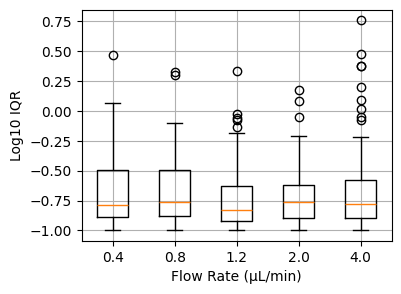

In [17]:
plt.figure(figsize=(4, 3))
means = [iqr(flows_data[i].values, axis=1) for i in np.arange(4, -1, -1)]
plt.boxplot([np.log10(means[i][means[i]>0.1]) for i in np.arange(5)],
            labels=['0.4', '0.8', '1.2', '2.0', '4.0'])
# plt.ylim(0, 0.5)
plt.xlabel('Flow Rate (µL/min)')
plt.ylabel('Log10 IQR')
# plt.title('Log10 Coefficient of Variation of analyte concentrations\nat different flow rates')
plt.grid(True)
plt.savefig('flow_rate_iqr_validation_boxplot.pdf', dpi=300)
plt.show()

In [126]:
def mad(x, axis=0):
    if axis == 0:
        return np.nanmedian(np.abs(x - np.nanmedian(x, axis=0)), axis=0)
    else:
        return np.nanmedian(np.abs(x.T - np.nanmedian(x.T, axis=0)), axis=0).T

/tmp/ipykernel_61262/2661193434.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([np.log10(cvs[i][cvs[i]<0.8]) for i in np.arange(5)],


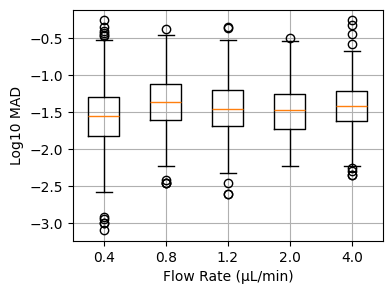

In [132]:
# plot log CVs
plt.figure(figsize=(4, 3))
cvs = [mad(flows_data[i].values, axis=1) for i in np.arange(4, -1, -1)]
plt.boxplot([np.log10(cvs[i][cvs[i]<0.8]) for i in np.arange(5)],
            labels=['0.4', '0.8', '1.2', '2.0', '4.0'])
# plt.ylim(0, 0.5)
plt.xlabel('Flow Rate (µL/min)')
plt.ylabel('Log10 MAD')
# plt.title('Log10 Coefficient of Variation of analyte concentrations\nat different flow rates')
plt.grid(True)
plt.show()